# Classification
## Logistic Regression Model
- Logistic Regression is a classification algorithm. Used to predict Binary outcomes.(0/1, yes/no, true/false, success/failure, male/female, head/tail)

## How does logistic regression works
- It measures the relationship between Input(Independent Variable) and Target(Dependent Variable) by estimating probabilities using Sigmoid function.

## Sigmoid Function 
- This function is an 'S;-Shaped Curve that map the real-valued number(between 0 to 1)
- It can converts any line into curve.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
num = 10
p = 1 / (1 + np.exp(-num))
p

0.9999546021312976

In [5]:
x = np.linspace(-10,10,100)
y = 1 / (1 + np.exp(-x))

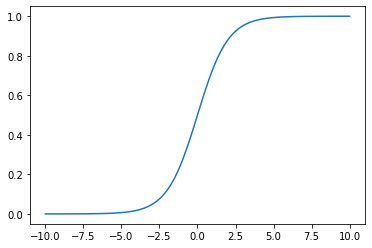

In [9]:
plt.plot(x,y)
plt.show()

In [10]:
df = pd.read_csv('Bid.csv')
df

,Number,Win_Loss
0,100,1
1,120,1
2,150,1
3,170,1
4,200,1
5,200,1
6,202,1
7,203,0
8,205,1
9,210,0


In [12]:
X = df['Number'].values
Y = df['Win_Loss'].values

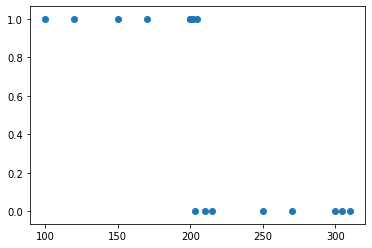

In [14]:
plt.scatter(X,Y)

In [15]:
n = len(X)
print(np.ndim(X))
X = X.reshape(n,1)
print(np.ndim(X))

1
2


In [16]:
from sklearn.linear_model import LogisticRegression

In [22]:
log_reg = LogisticRegression(C = 1.0,solver = 'lbfgs',multi_class = 'ovr')
log_reg.fit(X,Y)
log_predict = log_reg.predict(X)

In [23]:
log_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
print(log_reg.predict_proba([[200]]))

[[0.08194444 0.91805556]]


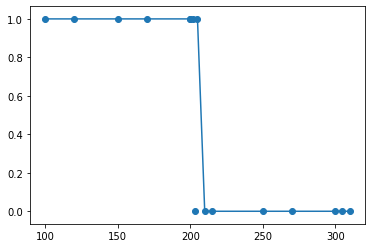

In [34]:
plt.scatter(X,Y)
plt.plot(X,log_predict)

## Apply logistic Regression on Framingham Dataset

In [67]:
df = pd.read_csv('Framingham.csv')
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [68]:
df.shape

(4238, 16)

In [69]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [70]:
df.index

RangeIndex(start=0, stop=4238, step=1)

- We dont need patient education details to test wheather he/she will get Heart stroke or not for next Ten Years.
- So Drop the education column from data

In [41]:
df.drop(['education'],axis = 1,inplace = True)

- Check whether the education column is removed or not

In [42]:
df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Check if any null values exist in the dataset

In [73]:
df.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [74]:
# No of null values in each column
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [75]:
# Total no.of null values in the data
df.isnull().sum().sum()

645

- We can replace the null values with mean value or 1/0. 
- Or else, We have 4238 rows in our dataset, so we can drop 645 rows (which contains null values).

In [43]:
df = df.dropna() # Remove the null value rows

In [44]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Now check how many columns and rows in data

In [76]:
df.shape

(4238, 16)

In [46]:
df.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

### Now convert few rows from float to integer data type

In [48]:
df['cigsPerDay'] = df['cigsPerDay'].astype(dtype = 'int64')
df['BPMeds'] = df['BPMeds'].astype(dtype = 'int64')
df['totChol'] = df['totChol'].astype(dtype = 'int64')
df['heartRate'] = df['heartRate'].astype(dtype = 'int64')
df['glucose'] = df['glucose'].astype(dtype = 'int64')
df.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay           int64
BPMeds               int64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol              int64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
glucose              int64
TenYearCHD           int64
dtype: object

In [77]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

In [79]:
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [80]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

### Split the dataset for traing and testing
- Import train_test_split
    - test_size = 0.3 ---> 30% testing data and remaining 70% for training data
    - random_state = 1/0 ---> randomly selects the rows for testing data

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state=1)

In [81]:
X_train,X_test

(      male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
 2673     1   36              1          20       0                0   
 1215     1   46              0           0       0                0   
 4233     1   50              1           1       0                0   
 4077     1   43              0           0       0                0   
 2365     0   32              1          15       0                0   
 680      0   55              0           0       0                0   
 711      1   57              1          43       0                0   
 1452     1   39              1          60       0                0   
 3175     0   50              1           9       0                0   
 1570     0   47              0           0       0                0   
 1507     1   52              0           0       0                0   
 3789     1   52              0           0       0                0   
 600      0   47              1          15       0             

In [82]:
Y_train,Y_test

(2673    0
 1215    0
 4233    1
 4077    0
 2365    0
 680     0
 711     0
 1452    0
 3175    0
 1570    1
 1507    0
 3789    0
 600     0
 720     0
 3582    0
 1827    0
 132     0
 695     1
 2331    0
 3196    0
 1867    0
 2016    0
 1386    0
 3197    0
 1123    0
 2347    0
 1424    0
 4068    1
 770     0
 4125    1
        ..
 3457    0
 3724    0
 2980    0
 630     0
 2774    0
 745     1
 4036    0
 277     1
 3353    0
 2851    0
 3360    0
 398     1
 1432    0
 1456    0
 1345    1
 3802    0
 3921    0
 2894    0
 3180    0
 4133    0
 142     0
 158     0
 1074    0
 3282    0
 4201    0
 3139    0
 1013    0
 1229    0
 258     0
 1189    0
 Name: TenYearCHD, Length: 2624, dtype: int64, 3013    0
 3564    1
 360     1
 4043    1
 112     0
 1668    0
 108     1
 3268    0
 2641    0
 2393    0
 2345    0
 2054    0
 3031    0
 2428    0
 3586    0
 107     1
 1419    0
 3833    1
 3584    0
 607     0
 3506    0
 2631    0
 2131    1
 202     0
 928     0
 2940   

In [56]:
X_train.shape,X_test.shape

((2624, 14), (1125, 14))

### Import logistic regression model

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log_reg2 =LogisticRegression()
log_reg2.fit(X_train,Y_train)
y_pred = log_reg2.predict(X_test)

C:\Users\Mouni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Testing with one row from X_test (Index no: 3564)

In [64]:
X_test.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3013,1,42,0,0,0,0,0,0,191,118.0,80.0,24.98,62,63
3564,1,40,0,0,0,0,0,0,161,122.0,85.0,30.80,75,85
360,1,40,1,20,0,0,0,0,283,146.0,95.0,23.27,80,64
4043,1,56,1,40,0,0,0,0,296,111.5,74.0,23.38,80,71
112,1,48,0,0,0,0,0,0,233,138.0,88.5,23.62,86,68


In [65]:
Y_test.head()

3013    0
3564    1
360     1
4043    1
112     0
Name: TenYearCHD, dtype: int64

In [66]:
log_reg2.predict([[1,40,0,0,0,0,0,0,161,122.0,85.0,30.80,75,85]])

array([0], dtype=int64)